In [1]:
# importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
#These codes were used to be able to look into dataframes more in depth (visualize more rows/columns)
#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

### Loading files and pre-processing data

In [3]:
# Reading the excel files from training document
df_all = pd.DataFrame()


import glob

file_name_list = []
for file in glob.glob("Training_files/*.xlsx"):
    df_temp = pd.read_excel(file)

    df_all = df_all.append(df_temp)

In [4]:
#create training dataframe
training = df_all.copy() 

In [5]:
#dropping the unnecessary columns
training = training.drop(['OpEx_pump (‚Ç¨)', 'CapEx (‚Ç¨)','OpEx (‚Ç¨)','LCOH costs','discounted LCOH costs','discounted LCOH energy','cashflow','NPV','LCOH_cum','System power (MW)','System power D1 (MW)','System power D2 (MW)','Produced Energy (MWh)'], axis = 1)
training.head()

,Time (yrs),E01,E02,E03,E04,E05,E06,I01,I02,I03,...,NW17,NW18,P01,P02,P03,D1 percentage,D2 presentage,D1 rate,D2 rate,LCOH (‚Ç¨/MWh)
0,0,1,1,1,1,2,2,2,2,2,...,2,2,2,1,2,0.948,0.518,37904,25876,NaN
1,1,1,1,1,1,2,2,2,2,2,...,2,2,2,1,2,0.948,0.518,37904,25876,102.654967
2,2,1,1,1,1,2,2,2,2,2,...,2,2,2,1,2,0.948,0.518,37904,25876,57.644692
3,3,1,1,1,1,2,2,2,2,2,...,2,2,2,1,2,0.948,0.518,37904,25876,42.695722
4,4,1,1,1,1,2,2,2,2,2,...,2,2,2,1,2,0.948,0.518,37904,25876,35.245288


In [6]:
#checking how many null and non-null values we have for each column
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 51
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time (yrs)        1456 non-null   int64  
 1   E01               1456 non-null   int64  
 2   E02               1456 non-null   int64  
 3   E03               1456 non-null   int64  
 4   E04               1456 non-null   int64  
 5   E05               1456 non-null   int64  
 6   E06               1456 non-null   int64  
 7   I01               1456 non-null   int64  
 8   I02               1456 non-null   int64  
 9   I03               1456 non-null   int64  
 10  NW01              1456 non-null   int64  
 11  NW02              1456 non-null   int64  
 12  NW03              1456 non-null   int64  
 13  NW04              1456 non-null   int64  
 14  NW05              1456 non-null   int64  
 15  NW06              1456 non-null   int64  
 16  NW07              1456 non-null   int64  
 1

In [7]:
#dropping the rows containing NA values
training = training.dropna()
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 1 to 51
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time (yrs)        1428 non-null   int64  
 1   E01               1428 non-null   int64  
 2   E02               1428 non-null   int64  
 3   E03               1428 non-null   int64  
 4   E04               1428 non-null   int64  
 5   E05               1428 non-null   int64  
 6   E06               1428 non-null   int64  
 7   I01               1428 non-null   int64  
 8   I02               1428 non-null   int64  
 9   I03               1428 non-null   int64  
 10  NW01              1428 non-null   int64  
 11  NW02              1428 non-null   int64  
 12  NW03              1428 non-null   int64  
 13  NW04              1428 non-null   int64  
 14  NW05              1428 non-null   int64  
 15  NW06              1428 non-null   int64  
 16  NW07              1428 non-null   int64  
 1

In [8]:
#create x_train for ML model
x_train = copy.copy(training)
del x_train['LCOH (‚Ç¨/MWh)']
x_train.head()

,Time (yrs),E01,E02,E03,E04,E05,E06,I01,I02,I03,...,NW16,NW17,NW18,P01,P02,P03,D1 percentage,D2 presentage,D1 rate,D2 rate
1,1,1,1,1,1,2,2,2,2,2,...,1,2,2,2,1,2,0.948,0.518,37904,25876
2,2,1,1,1,1,2,2,2,2,2,...,1,2,2,2,1,2,0.948,0.518,37904,25876
3,3,1,1,1,1,2,2,2,2,2,...,1,2,2,2,1,2,0.948,0.518,37904,25876
4,4,1,1,1,1,2,2,2,2,2,...,1,2,2,2,1,2,0.948,0.518,37904,25876
5,5,1,1,1,1,2,2,2,2,2,...,1,2,2,2,1,2,0.948,0.518,37904,25876


In [9]:
#create y_train for ML model
y_train = training.iloc[:,-1]
y_train.head()

1    102.654967
2     57.644692
3     42.695722
4     35.245288
5     30.789405
Name: LCOH (‚Ç¨/MWh), dtype: float64

In [10]:
# Reading the excel files from test document
df_test = pd.DataFrame()


import glob

for file in glob.glob("Test_files/*.xlsx"):
    df_temp = pd.read_excel(file)
    print (file)
    df_test = df_test.append(df_temp)

Test_files\NW13to18_Sheet5.xlsx
Test_files\NW1to6_Sheet5.xlsx
Test_files\NW7to12_Sheet5.xlsx
Test_files\NWopt_Sheet5.xlsx
Test_files\NWVar1_Sheet5.xlsx
Test_files\NWVar2_Sheet5.xlsx
Test_files\NWVar3_Sheet5.xlsx


In [11]:
#create test dataframe
test = df_test.copy()

In [12]:
#dropping the unnecessary columns
test = test.drop(['OpEx_pump (‚Ç¨)', 'CapEx (‚Ç¨)','OpEx (‚Ç¨)','LCOH costs','discounted LCOH costs','discounted LCOH energy','cashflow','NPV','LCOH_cum','System power (MW)','System power D1 (MW)','System power D2 (MW)','Produced Energy (MWh)'], axis = 1)
test.head()

,Time (yrs),E01,E02,E03,E04,E05,E06,I01,I02,I03,...,NW17,NW18,P01,P02,P03,D1 percentage,D2 presentage,D1 rate,D2 rate,LCOH (‚Ç¨/MWh)
0,0,1,1,1,1,2,2,2,2,2,...,2,2,2,1,2,0.795,0.52,31813,26042,NaN
1,1,1,1,1,1,2,2,2,2,2,...,2,2,2,1,2,0.795,0.52,31813,26042,112.521884
2,2,1,1,1,1,2,2,2,2,2,...,2,2,2,1,2,0.795,0.52,31813,26042,62.762081
3,3,1,1,1,1,2,2,2,2,2,...,2,2,2,1,2,0.795,0.52,31813,26042,46.234354
4,4,1,1,1,1,2,2,2,2,2,...,2,2,2,1,2,0.795,0.52,31813,26042,37.995863


In [13]:
#checking how many null and non-null values we have for each column
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 51
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time (yrs)        364 non-null    int64  
 1   E01               364 non-null    int64  
 2   E02               364 non-null    int64  
 3   E03               364 non-null    int64  
 4   E04               364 non-null    int64  
 5   E05               364 non-null    int64  
 6   E06               364 non-null    int64  
 7   I01               364 non-null    int64  
 8   I02               364 non-null    int64  
 9   I03               364 non-null    int64  
 10  NW01              364 non-null    int64  
 11  NW02              364 non-null    int64  
 12  NW03              364 non-null    int64  
 13  NW04              364 non-null    int64  
 14  NW05              364 non-null    int64  
 15  NW06              364 non-null    int64  
 16  NW07              364 non-null    int64  
 17

In [14]:
#dropping the rows containing NA values
test = test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1 to 51
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time (yrs)        357 non-null    int64  
 1   E01               357 non-null    int64  
 2   E02               357 non-null    int64  
 3   E03               357 non-null    int64  
 4   E04               357 non-null    int64  
 5   E05               357 non-null    int64  
 6   E06               357 non-null    int64  
 7   I01               357 non-null    int64  
 8   I02               357 non-null    int64  
 9   I03               357 non-null    int64  
 10  NW01              357 non-null    int64  
 11  NW02              357 non-null    int64  
 12  NW03              357 non-null    int64  
 13  NW04              357 non-null    int64  
 14  NW05              357 non-null    int64  
 15  NW06              357 non-null    int64  
 16  NW07              357 non-null    int64  
 17

In [15]:
# create x_test for ML model
x_test = copy.copy(test)
del x_test['LCOH (‚Ç¨/MWh)']
x_test.head()

,Time (yrs),E01,E02,E03,E04,E05,E06,I01,I02,I03,...,NW16,NW17,NW18,P01,P02,P03,D1 percentage,D2 presentage,D1 rate,D2 rate
1,1,1,1,1,1,2,2,2,2,2,...,1,2,2,2,1,2,0.795,0.52,31813,26042
2,2,1,1,1,1,2,2,2,2,2,...,1,2,2,2,1,2,0.795,0.52,31813,26042
3,3,1,1,1,1,2,2,2,2,2,...,1,2,2,2,1,2,0.795,0.52,31813,26042
4,4,1,1,1,1,2,2,2,2,2,...,1,2,2,2,1,2,0.795,0.52,31813,26042
5,5,1,1,1,1,2,2,2,2,2,...,1,2,2,2,1,2,0.795,0.52,31813,26042


In [16]:
#create y_test for ML model
y_test = test.iloc[:,-1]
y_test.head()

1    112.521884
2     62.762081
3     46.234354
4     37.995863
5     33.067767
Name: LCOH (‚Ç¨/MWh), dtype: float64

### Data is ready ---> ML model implementation 

In [17]:
#importing the needed libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [18]:
#create the model
reg_model = Pipeline([
        ("scalers", MinMaxScaler()),
        ("model", RandomForestRegressor()),
    ])

In [19]:
#fit the model
reg_model.fit(x_train, y_train)

C:\Users\adria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('scalers', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [20]:
# evaluate the model
y_pred = reg_model.predict(x_test)
score = reg_model.score(x_test,y_test)
print(f"The score for test set is {score}")

The score for test set is 0.8308298408930708


### The score for test set is 0.8324990765532438

In [21]:
# create dataframe with actual lcoh and predicted lcoh
comp1 = pd.DataFrame({'Actual LCOH': y_test, 'Predicted LCOH': y_pred})
comp1

,Actual LCOH,Predicted LCOH
1,112.521884,103.510193
2,62.762081,58.139520
3,46.234354,42.448933
4,37.995863,35.632737
5,33.067767,31.055097
...,...,...
47,16.267056,16.242551
48,16.259987,16.236767
49,16.253887,16.234375
50,16.248658,16.227148


In [22]:
#connect the actual/predicted lcoh dataframme with the test dataframe to be ablo to have the corresponding timesteps
comparing1 = pd.concat([test, comp1], axis=1)
display(comparing1)

,Time (yrs),E01,E02,E03,E04,E05,E06,I01,I02,I03,...,P01,P02,P03,D1 percentage,D2 presentage,D1 rate,D2 rate,LCOH (‚Ç¨/MWh),Actual LCOH,Predicted LCOH
1,1,1,1,1,1,2,2,2,2,2,...,2,1,2,0.795,0.520000,31813,26042,112.521884,112.521884,103.510193
2,2,1,1,1,1,2,2,2,2,2,...,2,1,2,0.795,0.520000,31813,26042,62.762081,62.762081,58.139520
3,3,1,1,1,1,2,2,2,2,2,...,2,1,2,0.795,0.520000,31813,26042,46.234354,46.234354,42.448933
4,4,1,1,1,1,2,2,2,2,2,...,2,1,2,0.795,0.520000,31813,26042,37.995863,37.995863,35.632737
5,5,1,1,1,1,2,2,2,2,2,...,2,1,2,0.795,0.520000,31813,26042,33.067767,33.067767,31.055097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,47,2,2,2,2,1,0,1,1,1,...,1,2,1,0.605,0.994595,24236,49730,16.267056,16.267056,16.242551
48,48,2,2,2,2,1,0,1,1,1,...,1,2,1,0.605,0.994595,24236,49730,16.259987,16.259987,16.236767
49,49,2,2,2,2,1,0,1,1,1,...,1,2,1,0.605,0.994595,24236,49730,16.253887,16.253887,16.234375
50,50,2,2,2,2,1,0,1,1,1,...,1,2,1,0.605,0.994595,24236,49730,16.248658,16.248658,16.227148


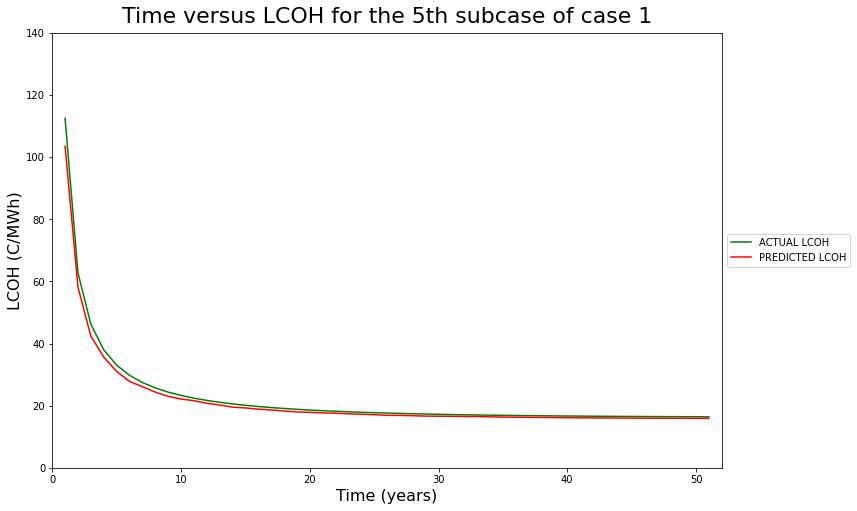

In [23]:
#print out the 5th subcase of case 1 (the first set with the time ranging from 0 to 51 yrs)
# will be done similarly for the other subcases
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[0:51,0],comparing1.iloc[0:51,36],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[0:51,0],comparing1.iloc[0:51,37],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,140)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('LCOH (C/MWh)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 1'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()

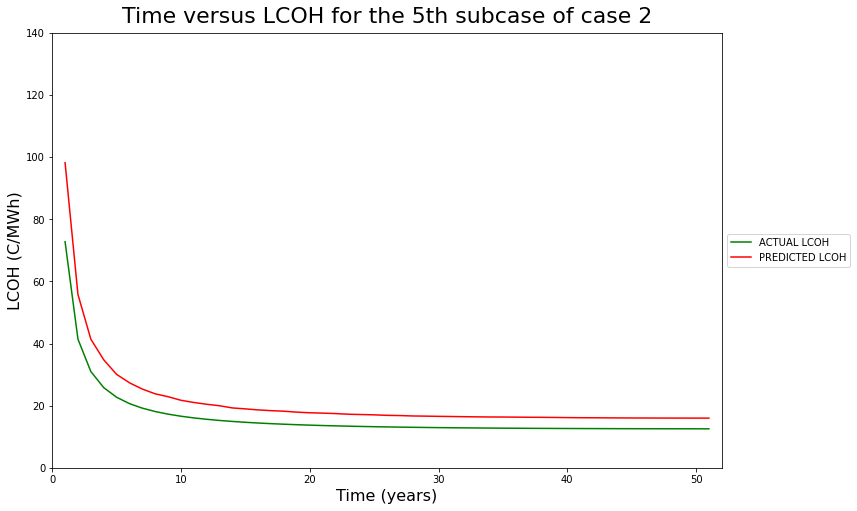

In [24]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[51:102,0],comparing1.iloc[51:102,36],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[51:102,0],comparing1.iloc[51:102,37],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,140)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('LCOH (C/MWh)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 2'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()

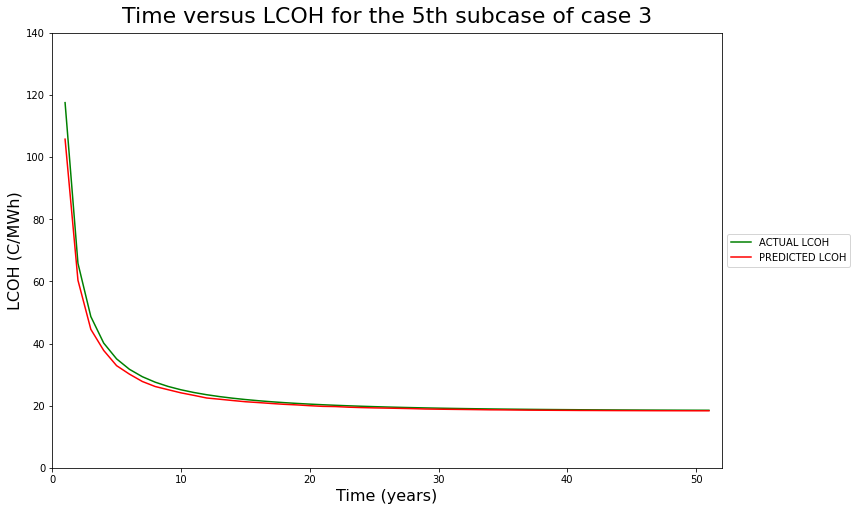

In [25]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[102:153,0],comparing1.iloc[102:153,36],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[102:153,0],comparing1.iloc[102:153,37],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,140)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('LCOH (C/MWh)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 3'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()

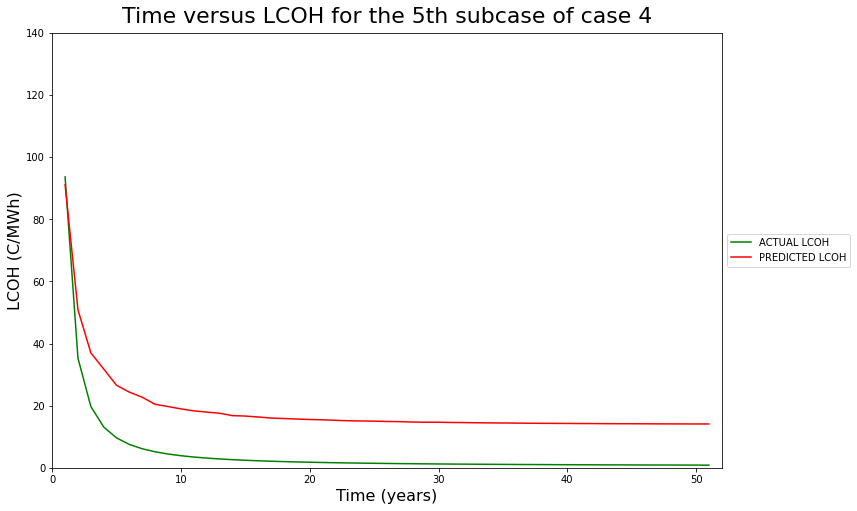

In [26]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[153:204,0],comparing1.iloc[153:204,36],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[153:204,0],comparing1.iloc[153:204,37],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,140)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('LCOH (C/MWh)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 4'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()

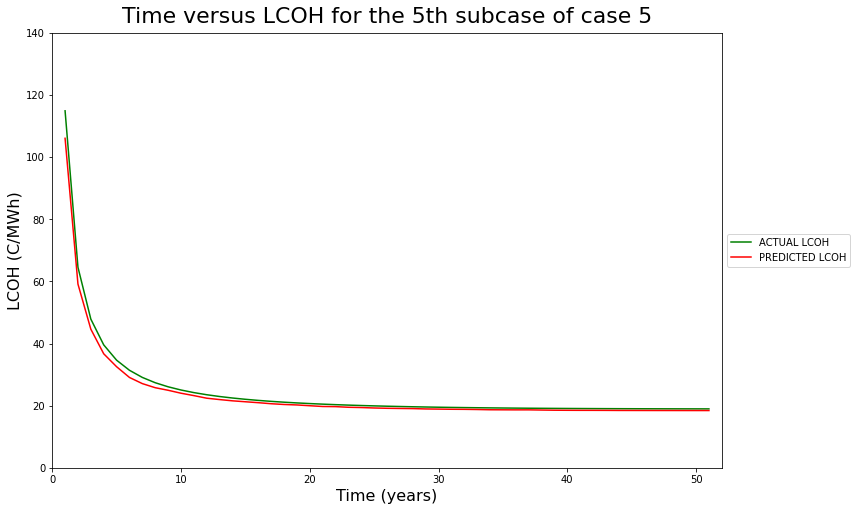

In [27]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[204:255,0],comparing1.iloc[204:255,36],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[204:255,0],comparing1.iloc[204:255,37],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,140)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('LCOH (C/MWh)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 5'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()

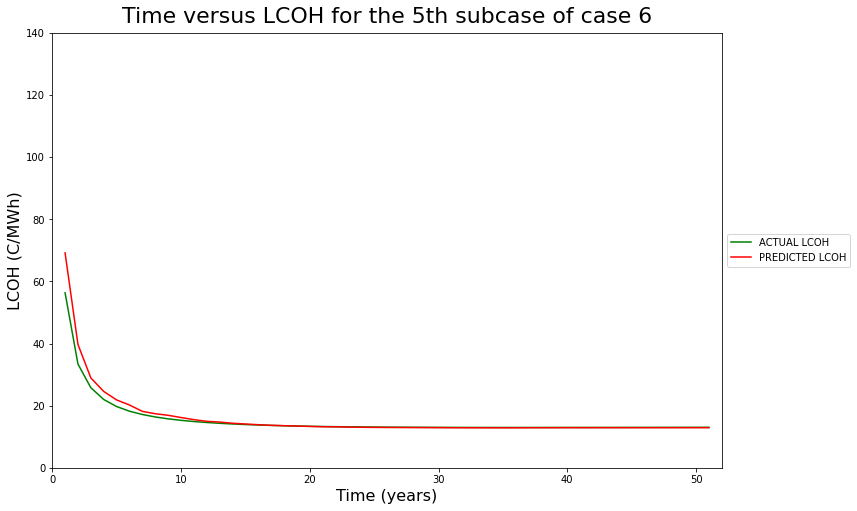

In [28]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[255:306,0],comparing1.iloc[255:306,36],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[255:306,0],comparing1.iloc[255:306,37],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,140)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('LCOH (C/MWh)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 6'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()

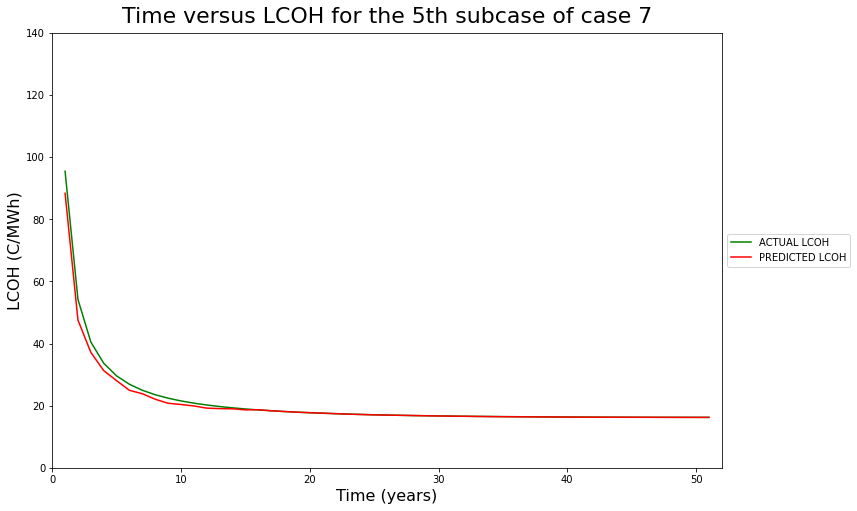

In [29]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[306:357,0],comparing1.iloc[306:357,36],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[306:357,0],comparing1.iloc[306:357,37],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,140)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('LCOH (C/MWh)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 7'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()